<a href="https://colab.research.google.com/github/dqniellew1/DLPT/blob/master/Mechanics_of_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
drive_dir = 'drive/My Drive/dlwpt-code/data/'

In [158]:
import torch

1. Get lots of good data.
2. Visualize the heck out of it
3. Choose the simplest model that had a chance to fit the data.
4. Spilt the data so that he could work on a part of it and keep an independent set for validation.
5. Start with a tentative "eccentricity" and size and iterate until the model fits the observations.
6. Validate model on the independent observations.
7. Look back in disbelief.


In [159]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c) # temperatures in Celsius
t_u = torch.tensor(t_u) # Unknown units

Using a linear model as first try

t_c = w * t_u + b

Based on the loss function we use, we can emphasise or discount certain errors.

Conceptually, a loss function is a way of prioritizing which errors to fix from our traning samples.

In [160]:
def model(t_u, w, b):
  return w * t_u + b

In [161]:
def loss_fn(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()

In [162]:
# Initalize the parameters
w = torch.ones(())
b = torch.zeros(())

In [163]:
t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [164]:
# Check the loss
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8846)

In [165]:
# Broadcasting Example
x = torch.ones(())
y = torch.ones(3,1)
z = torch.ones(1, 3)
a = torch.ones(2, 1, 1)
print(f"shapes: x: {x.shape}, y: {y.shape}, z: {z.shape}, a: {a.shape}")
print("x * y", (x * y).shape)
print("y * z", (y * z).shape)
print("y * z * a", (y * z * a).shape)


shapes: x: torch.Size([]), y: torch.Size([3, 1]), z: torch.Size([1, 3]), a: torch.Size([2, 1, 1])
x * y torch.Size([3, 1])
y * z torch.Size([3, 3])
y * z * a torch.Size([2, 3, 3])


In [166]:
# Gradient descent
delta = 0.1

loss_rate_of_change_w = \
  (loss_fn(model(t_u, w + delta, b), t_c) -
   loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

In [167]:
learning_rate = 1e-2

w = w - learning_rate * loss_rate_of_change_w

In [168]:
loss_rate_of_change_b = \
  (loss_fn(model(t_u, w, b + delta), t_c) - 
   loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)

In [169]:
b = b - learning_rate * loss_rate_of_change_b

Chain rule

d loss_fn / d w = (d loss_fn / d t_p) * (d t_p / d w)

In [170]:
# Derivative of loss fn
def dloss_fn(t_p, t_c):
  dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
  return dsq_diffs

In [171]:
# Derivative of model
def dmodel_dw(t_u, w, b):
  return t_u

def dmodel_db(t_u, w, b):
  return 1.0

In [172]:
# Putting the function together
def grad_fn(t_u, t_c, t_p, w, b):
  """
  Return the gradient of the loss with respect to 'w' and 'b'
  """
  dloss_dtp = dloss_fn(t_p, t_c)
  dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
  dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
  return torch.stack([dloss_dw.sum(), dloss_db.sum()]) # Sum is the backward of the broadcasting we implicitly do when applying the parameters to an entire vector of inputs in model.

In [173]:
# Training loop
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
  """
  Return optimal weight and bias that is used to learn
  """
  for epoch in range(1, n_epochs + 1):
    w, b = params

    t_p = model(t_u, w, b)
    loss = loss_fn(t_p, t_c)
    grad = grad_fn(t_u, t_c, t_p, w, b)

    params = params - learning_rate * grad

    print('Epoch %d, Loss %f' % (epoch, float(loss)))
  return params

In [174]:
training_loop(n_epochs=100, 
              learning_rate=1e-2, 
              params = torch.tensor([1.0, 0.0]),
              t_u = t_u,
              t_c = t_c)

Epoch 1, Loss 1763.884644
Epoch 2, Loss 5802485.500000
Epoch 3, Loss 19408035840.000000
Epoch 4, Loss 64915909902336.000000
Epoch 5, Loss 217130559820791808.000000
Epoch 6, Loss 726257583152928129024.000000
Epoch 7, Loss 2429183992928415200051200.000000
Epoch 8, Loss 8125126681682403942989824000.000000
Epoch 9, Loss 27176891792249147543971428302848.000000
Epoch 10, Loss 90901154706620645225508955521810432.000000
Epoch 11, Loss inf
Epoch 12, Loss inf
Epoch 13, Loss inf
Epoch 14, Loss inf
Epoch 15, Loss inf
Epoch 16, Loss inf
Epoch 17, Loss inf
Epoch 18, Loss inf
Epoch 19, Loss inf
Epoch 20, Loss inf
Epoch 21, Loss inf
Epoch 22, Loss inf
Epoch 23, Loss nan
Epoch 24, Loss nan
Epoch 25, Loss nan
Epoch 26, Loss nan
Epoch 27, Loss nan
Epoch 28, Loss nan
Epoch 29, Loss nan
Epoch 30, Loss nan
Epoch 31, Loss nan
Epoch 32, Loss nan
Epoch 33, Loss nan
Epoch 34, Loss nan
Epoch 35, Loss nan
Epoch 36, Loss nan
Epoch 37, Loss nan
Epoch 38, Loss nan
Epoch 39, Loss nan
Epoch 40, Loss nan
Epoch 41, Loss

tensor([nan, nan])

We get nan values as `params` are receiving updates that are too large and their values start to oscillate back and forth. As each update overshoots, and the next over-corrects even more. The optimization process is unstable, it diverges instead of converging to a **minimum**. We want to see smaller and smaller updates to `params`, not larger.

We can limnit the magnitude of the `learning_rate * grad` by choosing a smaller `learning_rate`.

In [175]:
training_loop(n_epochs=100,
              learning_rate= 1e-4,
              params = torch.tensor([1.0, 0.0]),
              t_u = t_u,
              t_c = t_c)

Epoch 1, Loss 1763.884644
Epoch 2, Loss 323.090546
Epoch 3, Loss 78.929634
Epoch 4, Loss 37.552845
Epoch 5, Loss 30.540285
Epoch 6, Loss 29.351152
Epoch 7, Loss 29.148882
Epoch 8, Loss 29.113848
Epoch 9, Loss 29.107145
Epoch 10, Loss 29.105242
Epoch 11, Loss 29.104168
Epoch 12, Loss 29.103222
Epoch 13, Loss 29.102297
Epoch 14, Loss 29.101379
Epoch 15, Loss 29.100470
Epoch 16, Loss 29.099548
Epoch 17, Loss 29.098631
Epoch 18, Loss 29.097715
Epoch 19, Loss 29.096796
Epoch 20, Loss 29.095884
Epoch 21, Loss 29.094959
Epoch 22, Loss 29.094049
Epoch 23, Loss 29.093134
Epoch 24, Loss 29.092213
Epoch 25, Loss 29.091297
Epoch 26, Loss 29.090382
Epoch 27, Loss 29.089460
Epoch 28, Loss 29.088549
Epoch 29, Loss 29.087635
Epoch 30, Loss 29.086718
Epoch 31, Loss 29.085808
Epoch 32, Loss 29.084888
Epoch 33, Loss 29.083965
Epoch 34, Loss 29.083057
Epoch 35, Loss 29.082142
Epoch 36, Loss 29.081219
Epoch 37, Loss 29.080309
Epoch 38, Loss 29.079393
Epoch 39, Loss 29.078474
Epoch 40, Loss 29.077559
Epoch 

tensor([ 0.2327, -0.0438])

In [176]:
# Rescale the input so gradients aren't quite so different for the weights and biases
t_un = 0.1 * t_u

In [177]:
# Run the traning loop again with the new inputs
training_loop(n_epochs=100,
              learning_rate=1e-2,
              params = torch.tensor([1.0, 0.0]),
              t_u = t_un,
              t_c = t_c)

Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574917
Epoch 3, Loss 30.871077
Epoch 4, Loss 29.756193
Epoch 5, Loss 29.507149
Epoch 6, Loss 29.392458
Epoch 7, Loss 29.298828
Epoch 8, Loss 29.208717
Epoch 9, Loss 29.119417
Epoch 10, Loss 29.030487
Epoch 11, Loss 28.941875
Epoch 12, Loss 28.853565
Epoch 13, Loss 28.765556
Epoch 14, Loss 28.677851
Epoch 15, Loss 28.590431
Epoch 16, Loss 28.503321
Epoch 17, Loss 28.416496
Epoch 18, Loss 28.329975
Epoch 19, Loss 28.243738
Epoch 20, Loss 28.157801
Epoch 21, Loss 28.072151
Epoch 22, Loss 27.986799
Epoch 23, Loss 27.901731
Epoch 24, Loss 27.816954
Epoch 25, Loss 27.732460
Epoch 26, Loss 27.648256
Epoch 27, Loss 27.564342
Epoch 28, Loss 27.480711
Epoch 29, Loss 27.397358
Epoch 30, Loss 27.314295
Epoch 31, Loss 27.231512
Epoch 32, Loss 27.149006
Epoch 33, Loss 27.066790
Epoch 34, Loss 26.984844
Epoch 35, Loss 26.903173
Epoch 36, Loss 26.821791
Epoch 37, Loss 26.740675
Epoch 38, Loss 26.659838
Epoch 39, Loss 26.579279
Epoch 40, Loss 26.498987
Epoch 41,

tensor([ 2.7553, -2.5162])

In [178]:
%%timeit
params = training_loop(
    n_epochs = 5000,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0]),
    t_u = t_un,
    t_c = t_c)

Streaming output truncated to the last 5000 lines.
Epoch 3, Loss 30.871077
Epoch 4, Loss 29.756193
Epoch 5, Loss 29.507149
Epoch 6, Loss 29.392458
Epoch 7, Loss 29.298828
Epoch 8, Loss 29.208717
Epoch 9, Loss 29.119417
Epoch 10, Loss 29.030487
Epoch 11, Loss 28.941875
Epoch 12, Loss 28.853565
Epoch 13, Loss 28.765556
Epoch 14, Loss 28.677851
Epoch 15, Loss 28.590431
Epoch 16, Loss 28.503321
Epoch 17, Loss 28.416496
Epoch 18, Loss 28.329975
Epoch 19, Loss 28.243738
Epoch 20, Loss 28.157801
Epoch 21, Loss 28.072151
Epoch 22, Loss 27.986799
Epoch 23, Loss 27.901731
Epoch 24, Loss 27.816954
Epoch 25, Loss 27.732460
Epoch 26, Loss 27.648256
Epoch 27, Loss 27.564342
Epoch 28, Loss 27.480711
Epoch 29, Loss 27.397358
Epoch 30, Loss 27.314295
Epoch 31, Loss 27.231512
Epoch 32, Loss 27.149006
Epoch 33, Loss 27.066790
Epoch 34, Loss 26.984844
Epoch 35, Loss 26.903173
Epoch 36, Loss 26.821791
Epoch 37, Loss 26.740675
Epoch 38, Loss 26.659838
Epoch 39, Loss 26.579279
Epoch 40, Loss 26.498987
Epoch 

In [179]:
params

tensor([  5.3613, -16.7575], requires_grad=True)

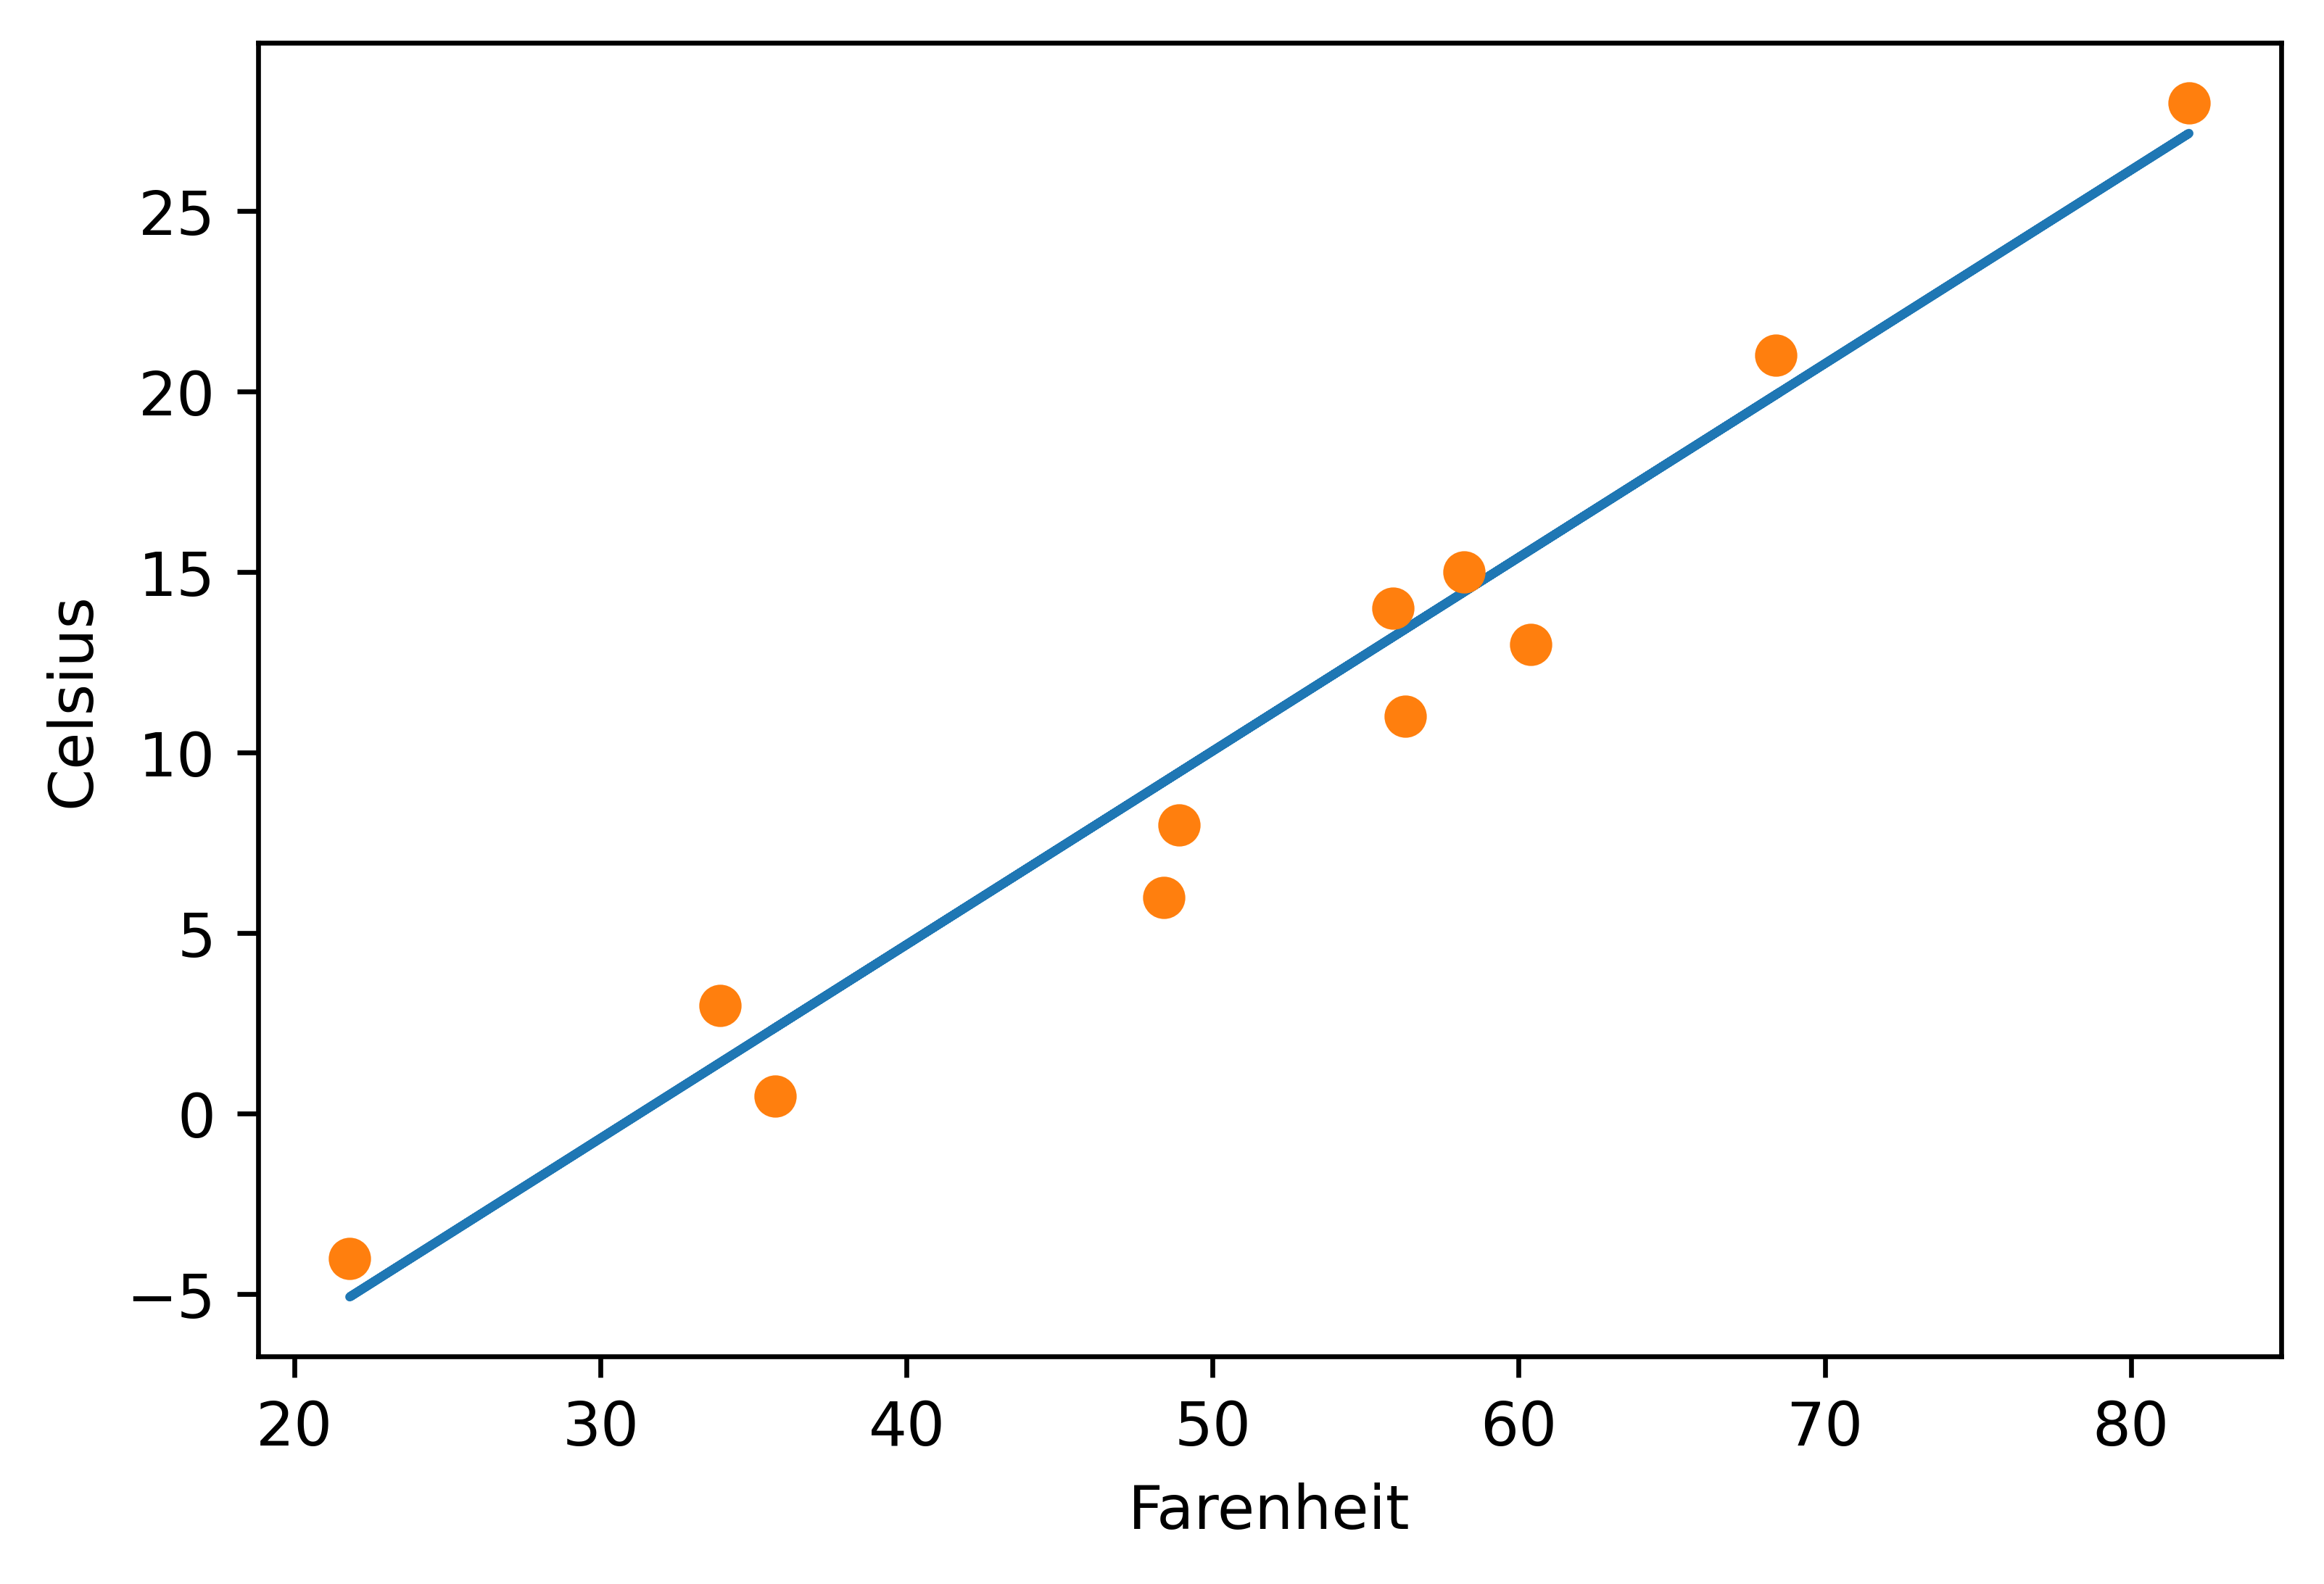

In [180]:
%matplotlib inline
from matplotlib import pyplot as plt 

t_p = model(t_un, *params)

fig = plt.figure(dpi=600)
plt.xlabel("Farenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o');

PyTorch with autograd

In [181]:
def model(t_u, w, b):
  return w * t_u + b

In [182]:
def loss_fn(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()

In [183]:
# Initialize our parameters' tensor
params = torch.tensor([1.0, 0.0], requires_grad=True) # auto_grad track the entire family tree of tensors resulting from operations on params

In [184]:
# PyTorch tensors have a attribute name `grad`
params.grad is None

True

In [185]:
loss = loss_fn(model(t_u, *params), t_c)
loss.backward()

params.grad

tensor([4517.2969,   82.6000])

Calling `backward` will lead derivatives to **accumalate**. We need to **zero** the gradients explicitly at each iteration.

In [186]:
if params.grad is not None:
  params.grad.zero_()

In [187]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
  """
  PyTorch implementation of the autograd training loop
  """
  for epoch in range(1, n_epochs + 1):
    if params.grad is not None:
      params.grad.zero_() # Done at any point in the loop prior to calling loss.backward()

    t_p = model(t_u, *params)
    loss = loss_fn(t_p, t_c)
    loss.backward()

    with torch.no_grad():
      params -= learning_rate * params.grad

    if epoch % 500 == 0:
      print('Epoch %d, Loss %f' % (epoch, float(loss)))
    
  return params

In [188]:
training_loop(n_epochs=5000,
              learning_rate=1e-2,
              params=torch.tensor([1.0, 0.0], requires_grad=True),
              t_u = t_un,
              t_c = t_c)

Epoch 500, Loss 7.860116
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957697
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)

In [189]:
# PyTorch optimization strategy
import torch.optim as optim

In [190]:
# Create params and instantiate a gradient descent optimizer
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate) # receives params, learning rate as variables

In [191]:
# Try our new optimizer
t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)

optimizer.zero_grad() # zero out gradients before backward pass
loss.backward()
optimizer.step() # update value in params eg: w, b

params

tensor([-44.1730,  -0.8260], requires_grad=True)

In [192]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
  """
  Training loop with optimizer implementation

  *optimizer receives learning rate so can exlude in training loop
  """
  for epoch in range(1, n_epochs + 1):
    t_p = model(t_u, *params)
    loss = loss_fn(t_p, t_c)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
      print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

  return params

In [193]:
# Initiate params
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

In [194]:
training_loop(n_epochs=5000,
              optimizer=optimizer,
              params=params,
              t_u = t_un,
              t_c = t_c)

Epoch: 500, Loss: 7.860118
Epoch: 1000, Loss: 3.828538
Epoch: 1500, Loss: 3.092191
Epoch: 2000, Loss: 2.957697
Epoch: 2500, Loss: 2.933134
Epoch: 3000, Loss: 2.928648
Epoch: 3500, Loss: 2.927830
Epoch: 4000, Loss: 2.927680
Epoch: 4500, Loss: 2.927651
Epoch: 5000, Loss: 2.927648


tensor([  5.3671, -17.3012], requires_grad=True)

In [195]:
# Adam optimizer
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-1
optimizer = optim.Adam([params], lr=learning_rate)

In [196]:
training_loop(n_epochs=5000, 
              optimizer=optimizer,
              params=params,
              t_u=t_u,
              t_c=t_c)

Epoch: 500, Loss: 7.612903
Epoch: 1000, Loss: 3.086700
Epoch: 1500, Loss: 2.928578
Epoch: 2000, Loss: 2.927646
Epoch: 2500, Loss: 2.927646
Epoch: 3000, Loss: 2.927645
Epoch: 3500, Loss: 2.927647
Epoch: 4000, Loss: 2.927645
Epoch: 4500, Loss: 2.927646
Epoch: 5000, Loss: 2.927646


tensor([  0.5368, -17.3048], requires_grad=True)

## Training, Validation and Overfitting

Shuffle `t_u` and `t_c` and then splitting the resulting shuffled tensor in two parts.

Shuffling the elements of a tensor amounts to finding a permutation of its indices. The `randperm` function does exactly this.

In [197]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

In [198]:
train_indices = shuffled_indices[:-n_val] # up to n_val
val_indices = shuffled_indices[-n_val:] # last n_val onwards

train_indices, val_indices

(tensor([ 9,  1,  7,  2,  3,  6,  0,  8, 10]), tensor([5, 4]))

In [199]:
# Build training and validation set 
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

# scale our data
train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [200]:
# Update the training loop
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
  for epoch in range(1, n_epochs + 1):
    train_t_p = model(train_t_u, *params)
    train_loss = loss_fn(train_t_p, train_t_c)

    val_t_p = model(val_t_u, *params)
    val_loss = loss_fn(val_t_p, val_t_c)

    optimizer.zero_grad()
    train_loss.backward() # There is no val.backward() as we dont want to train the model on val data
    optimizer.step()

    if epoch <= 3 or epoch % 500 == 0:
      print("Epoch {}, Training loss {}. Validation loss {}".format(
          epoch, float(train_loss), float(val_loss)))
      
  return params
                    

In [201]:
# Initalize our params
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(n_epochs=3000,
              optimizer=optimizer,
              params = params,
              train_t_u = train_t_un,
              val_t_u = val_t_un,
              train_t_c = train_t_c,
              val_t_c = val_t_c)

Epoch 1, Training loss 93.94430541992188. Validation loss 19.254497528076172
Epoch 2, Training loss 43.229862213134766. Validation loss 0.7752135396003723
Epoch 3, Training loss 35.53615951538086. Validation loss 4.8714165687561035
Epoch 500, Training loss 7.1039228439331055. Validation loss 5.210794925689697
Epoch 1000, Training loss 3.5098443031311035. Validation loss 3.8908157348632812
Epoch 1500, Training loss 3.0398659706115723. Validation loss 3.5030860900878906
Epoch 2000, Training loss 2.9784066677093506. Validation loss 3.374584674835205
Epoch 2500, Training loss 2.970372200012207. Validation loss 3.3296408653259277
Epoch 3000, Training loss 2.9693212509155273. Validation loss 3.3135972023010254


tensor([  5.3838, -17.0660], requires_grad=True)

Optimized tracking comes with additional cost that we could totally forgo during the validation pass. Therefore, PyTorch allows us to switch off autograd when we don't need it using the `torch.no_grad` context manager.

We can make sure this works by checking the value of the `requires_grad` attribute on the `val_loss` tensor.

In [202]:
# No_grad on val portion of the training loop
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
  for epoch in range(1, n_epoch + 1):
    train_t_p = model(train_t_u, *params)
    train_loss = loss_fn(train_t_p, train_t_c)

    # Check this value on validation
    with torch.no_grad():
      val_t_p = model(val_t_u, *params)
      val_loss = loss_fn(val_t_p, val_t_c)
      assert val_loss.requires_grad == False # Check that outputs require_grad args are forced to False in this line.

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    

We can also use the `set_grad_enabled` context to condition code to run with `autograd` enabled or disabled.

Typically indicating whether we are running in training or inference. We could for instance define a `calc_forward` function that takes data in input and runs `models` and `loss_fn` with or without autograd according to a boolean `train_is` argument.

In [203]:
def calc_forward(t_u, t_c, is_train):
  with torch.set_grad_enabled(is_train):
    t_p = model(t_u, *params)
    loss = loss_fn(t_p, t_c)
  return loss

# Exercise

In [204]:
def model(t_u, w1, w2, b):
  return w2 * t_u ** 2 + w1 * t_u + b

In [250]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
  for epoch in range(1, n_epochs + 1):
    t_p = model(t_u, *params)
    loss = loss_fn(t_p, t_c) # forward pass 
    
    optimizer.zero_grad()
    loss.backward() # backward pass to estimate gradients
    optimizer.step() # optimize weights of models using our optim strategy

    if epoch % 500 == 0:
      print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

  return params

Nothing from the training loop needs to be changed when adding an additional parameter to the model. Only the additonal parameter have to be defined in `params`. Compared to our original model, it performs **worse** with the same configurations. It requries a higher learning rate to converge.

In [268]:
# Instantiate params
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 5e-4
optimizer = optim.SGD([params], lr=learning_rate)

In [270]:
training_loop(n_epochs=5000,
              optimizer=optimizer,
              params=params,
              t_u = t_un,
              t_c = t_c)

Epoch: 500, Loss: 3.435097
Epoch: 1000, Loss: 3.417055
Epoch: 1500, Loss: 3.399295
Epoch: 2000, Loss: 3.381780
Epoch: 2500, Loss: 3.364504
Epoch: 3000, Loss: 3.347459
Epoch: 3500, Loss: 3.330641
Epoch: 4000, Loss: 3.314050
Epoch: 4500, Loss: 3.297679
Epoch: 5000, Loss: 3.281527


tensor([-0.9547,  0.5939, -1.9020], requires_grad=True)